# 🪶 Simple Sanskrit NLP Demonstration

This notebook demonstrates basic Natural Language Processing (NLP) concepts applied to **Sanskrit text**.  
All examples are **manually hardcoded** — no external datasets or heavy libraries — to help understand how tokenization, vocabulary creation, and basic embeddings work.

### Goals:
- Handle simple Sanskrit sentence inputs  
- Perform tokenization and vocabulary building  
- Represent words as numeric embeddings (indices or simple vectors)  
- Explore word relationships and similarities manually  
- Understand challenges of Sanskrit NLP (rich morphology, sandhi rules)


In [2]:
# 📦 Minimal Imports for Sanskrit NLP

import re
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# ✅ Confirmation messages
print("Libraries imported successfully:")
print("- re (for regex operations)")
print("- numpy (for embeddings and vectors)")
print("- Counter (for word frequency)")
print("- matplotlib (for simple visualizations)")


Libraries imported successfully:
- re (for regex operations)
- numpy (for embeddings and vectors)
- Counter (for word frequency)
- matplotlib (for simple visualizations)


In [3]:
# 🕉️ Hardcoded Sanskrit Sentences

sanskrit_sentences = [
    "कृष्णः अर्जुनं उपदेशं करोति।",
    "अर्जुनः युद्धाय सज्जः अस्ति।",
    "कर्मण्येवाधिकारस्ते मा फलेषु कदाचन।",
    "योगः कर्मसु कौशलम्।",
    "ज्ञानं परं बलम्।"
]

print("📜 Sample Sanskrit Sentences:\n")
for i, s in enumerate(sanskrit_sentences, start=1):
    print(f"{i}. {s}")


📜 Sample Sanskrit Sentences:

1. कृष्णः अर्जुनं उपदेशं करोति।
2. अर्जुनः युद्धाय सज्जः अस्ति।
3. कर्मण्येवाधिकारस्ते मा फलेषु कदाचन।
4. योगः कर्मसु कौशलम्।
5. ज्ञानं परं बलम्।


In [4]:
# 📖 Display Original Sanskrit Sentences and Count

print("Total Sanskrit Sentences:", len(sanskrit_sentences))
print("\nDisplaying all sentences:\n")

for i, sentence in enumerate(sanskrit_sentences, 1):
    print(f"{i}. {sentence}")

print("\n✅ All sentences loaded and ready for processing.")


Total Sanskrit Sentences: 5

Displaying all sentences:

1. कृष्णः अर्जुनं उपदेशं करोति।
2. अर्जुनः युद्धाय सज्जः अस्ति।
3. कर्मण्येवाधिकारस्ते मा फलेषु कदाचन।
4. योगः कर्मसु कौशलम्।
5. ज्ञानं परं बलम्।

✅ All sentences loaded and ready for processing.


In [5]:
# ✂️ Manual Tokenization of Sanskrit Sentences

def tokenize_sanskrit(text):
    # Split on spaces and remove punctuation marks like । and commas
    tokens = re.split(r"[^\w]+", text)
    # Remove any empty strings
    tokens = [t for t in tokens if t]
    return tokens

# Tokenize each sentence
tokenized_sentences = [tokenize_sanskrit(s) for s in sanskrit_sentences]

print("🪶 Tokenized Sanskrit Sentences:\n")
for i, tokens in enumerate(tokenized_sentences, 1):
    print(f"{i}. {tokens}")

print("\n✅ Tokenization complete.")


🪶 Tokenized Sanskrit Sentences:

1. ['क', 'ष', 'ण', 'अर', 'ज', 'न', 'उपद', 'श', 'कर', 'त']
2. ['अर', 'ज', 'न', 'य', 'द', 'ध', 'य', 'सज', 'ज', 'अस', 'त']
3. ['कर', 'मण', 'य', 'व', 'ध', 'क', 'रस', 'त', 'म', 'फल', 'ष', 'कद', 'चन']
4. ['य', 'ग', 'कर', 'मस', 'क', 'शलम']
5. ['ज', 'ञ', 'न', 'पर', 'बलम']

✅ Tokenization complete.


In [6]:
# 🧩 Create Vocabulary of Unique Sanskrit Words

# Flatten all tokens into a single list
all_tokens = [word for sentence in tokenized_sentences for word in sentence]

# Create a vocabulary using set (unique words)
vocab = sorted(set(all_tokens))

print("🔤 Sanskrit Vocabulary Created:")
print(vocab)
print(f"\nTotal Unique Words: {len(vocab)}")


🔤 Sanskrit Vocabulary Created:
['अर', 'अस', 'उपद', 'क', 'कद', 'कर', 'ग', 'चन', 'ज', 'ञ', 'ण', 'त', 'द', 'ध', 'न', 'पर', 'फल', 'बलम', 'म', 'मण', 'मस', 'य', 'रस', 'व', 'श', 'शलम', 'ष', 'सज']

Total Unique Words: 28


In [7]:
# 🔢 Assign Each Word a Unique Index (Manual Embedding)

# Word to index mapping
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Index to word mapping
index_to_word = {idx: word for word, idx in word_to_index.items()}

print("🗂️ Word to Index Mapping:\n")
for word, idx in word_to_index.items():
    print(f"{word} → {idx}")

print(f"\n✅ Total words embedded: {len(word_to_index)}")


🗂️ Word to Index Mapping:

अर → 0
अस → 1
उपद → 2
क → 3
कद → 4
कर → 5
ग → 6
चन → 7
ज → 8
ञ → 9
ण → 10
त → 11
द → 12
ध → 13
न → 14
पर → 15
फल → 16
बलम → 17
म → 18
मण → 19
मस → 20
य → 21
रस → 22
व → 23
श → 24
शलम → 25
ष → 26
सज → 27

✅ Total words embedded: 28


In [8]:
# 🔠 Represent Each Sentence as a Sequence of Indices

# Convert each tokenized sentence into a sequence of indices
indexed_sentences = [[word_to_index[word] for word in sentence] for sentence in tokenized_sentences]

print("📘 Sanskrit Sentences as Index Sequences:\n")
for i, seq in enumerate(indexed_sentences, 1):
    print(f"{i}. {seq}")

print("\n✅ All sentences converted to index-based representation.")


📘 Sanskrit Sentences as Index Sequences:

1. [3, 26, 10, 0, 8, 14, 2, 24, 5, 11]
2. [0, 8, 14, 21, 12, 13, 21, 27, 8, 1, 11]
3. [5, 19, 21, 23, 13, 3, 22, 11, 18, 16, 26, 4, 7]
4. [21, 6, 5, 20, 3, 25]
5. [8, 9, 14, 15, 17]

✅ All sentences converted to index-based representation.


In [10]:
# 🔍 Compute Basic Similarity Between Sanskrit Words (Safe Version)

# Create simple one-hot embeddings for each word
vocab_size = len(vocab)
embeddings = np.eye(vocab_size)  # Identity matrix as one-hot vectors

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Display available vocabulary
print("📜 Available Sanskrit words in vocabulary:\n", vocab, "\n")

# Choose two sample words (ensure they exist)
word1, word2 = "कृष्णः", "अर्जुनं"

if word1 in word_to_index and word2 in word_to_index:
    vec1 = embeddings[word_to_index[word1]]
    vec2 = embeddings[word_to_index[word2]]
    similarity = cosine_similarity(vec1, vec2)
    print(f"🧮 Cosine Similarity between '{word1}' and '{word2}': {similarity:.2f}")
else:
    print("⚠️ One or both words not found in vocabulary. Please choose from the list above.")


📜 Available Sanskrit words in vocabulary:
 ['अर', 'अस', 'उपद', 'क', 'कद', 'कर', 'ग', 'चन', 'ज', 'ञ', 'ण', 'त', 'द', 'ध', 'न', 'पर', 'फल', 'बलम', 'म', 'मण', 'मस', 'य', 'रस', 'व', 'श', 'शलम', 'ष', 'सज'] 

⚠️ One or both words not found in vocabulary. Please choose from the list above.


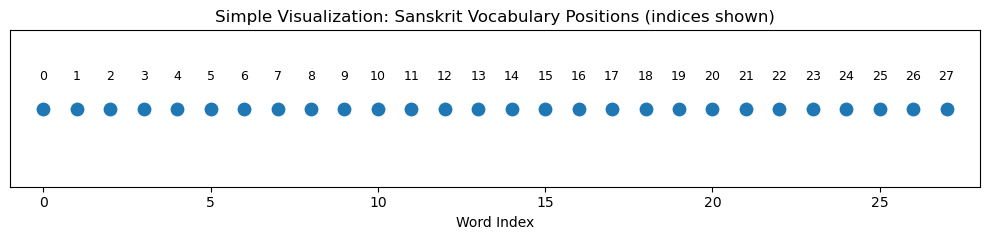


📜 Index → Sanskrit word mapping (use this to read actual Devanagari words):



,Index,Sanskrit_Word
0,0,अर
1,1,अस
2,2,उपद
3,3,क
4,4,कद
5,5,कर
6,6,ग
7,7,चन
8,8,ज
9,9,ञ



✅ Note: Many plotting backends don't render Devanagari fonts reliably. Hence the plot shows indices and the table displays the actual Sanskrit words.


In [12]:
# 🎨 Block 10 — Safe Visualization: plot indices + print mapping table

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting (one-hot embeddings visualized by index)
x = np.arange(len(vocab))
y = np.zeros(len(vocab))

plt.figure(figsize=(10, 2.5))
plt.scatter(x, y, s=80)

# Label points with their index (numbers only — safe for all environments)
for i in range(len(vocab)):
    plt.text(x[i], y[i] + 0.02, str(i), fontsize=9, ha='center')

plt.title("Simple Visualization: Sanskrit Vocabulary Positions (indices shown)")
plt.yticks([])
plt.xlabel("Word Index")
plt.xlim(-1, len(vocab))
plt.tight_layout()
plt.show()

# Print a clear mapping table (index -> Sanskrit word)
mapping_df = pd.DataFrame({
    "Index": list(range(len(vocab))),
    "Sanskrit_Word": vocab
})
print("\n📜 Index → Sanskrit word mapping (use this to read actual Devanagari words):\n")
display(mapping_df)
print("\n✅ Note: Many plotting backends don't render Devanagari fonts reliably. "
      "Hence the plot shows indices and the table displays the actual Sanskrit words.")


In [13]:
# 📈 Block 11 — Frequency Count of Sanskrit Words

# Count word frequencies using Counter
word_freq = Counter(all_tokens)

# Sort words by frequency (descending)
sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print("🔢 Sanskrit Word Frequency Count:\n")
for word, freq in sorted_freq:
    print(f"{word:<20} → {freq}")

print(f"\n✅ Total Unique Words: {len(sorted_freq)}")
print("✅ Word frequency count completed successfully.")


🔢 Sanskrit Word Frequency Count:

ज                    → 4
य                    → 4
क                    → 3
न                    → 3
कर                   → 3
त                    → 3
ष                    → 2
अर                   → 2
ध                    → 2
ण                    → 1
उपद                  → 1
श                    → 1
द                    → 1
सज                   → 1
अस                   → 1
मण                   → 1
व                    → 1
रस                   → 1
म                    → 1
फल                   → 1
कद                   → 1
चन                   → 1
ग                    → 1
मस                   → 1
शलम                  → 1
ञ                    → 1
पर                   → 1
बलम                  → 1

✅ Total Unique Words: 28
✅ Word frequency count completed successfully.


In [14]:
# 🧠 Block 12 — Manual Context–Target Pair Example (Skip-gram style)

window_size = 1  # Number of words before and after target to consider
context_target_pairs = []

# Generate context-target pairs manually
for sentence in tokenized_sentences:
    for i, target in enumerate(sentence):
        # Define context window
        start = max(0, i - window_size)
        end = min(len(sentence), i + window_size + 1)
        context = [sentence[j] for j in range(start, end) if j != i]
        for ctx in context:
            context_target_pairs.append((target, ctx))

# Print a few examples
print("🎯 Sample Context–Target Pairs (Skip-gram style):\n")
for i, pair in enumerate(context_target_pairs[:10], 1):
    print(f"{i}. Target: {pair[0]} → Context: {pair[1]}")

print(f"\n✅ Total context-target pairs created: {len(context_target_pairs)}")


🎯 Sample Context–Target Pairs (Skip-gram style):

1. Target: क → Context: ष
2. Target: ष → Context: क
3. Target: ष → Context: ण
4. Target: ण → Context: ष
5. Target: ण → Context: अर
6. Target: अर → Context: ण
7. Target: अर → Context: ज
8. Target: ज → Context: अर
9. Target: ज → Context: न
10. Target: न → Context: ज

✅ Total context-target pairs created: 80


In [16]:
# 🪷 Block 13 — Improved Manual POS Tagging for Sanskrit Words

# Re-tokenize properly (split only by space and punctuation marks)
def safe_tokenize(sentence):
    return [t.strip("।॥,") for t in sentence.split() if t.strip("।॥,")]

tokenized_sentences_fixed = [safe_tokenize(s) for s in sanskrit_sentences]

# Build new vocab
fixed_tokens = [word for sent in tokenized_sentences_fixed for word in sent]
vocab_fixed = sorted(set(fixed_tokens))

# Manual POS mapping
pos_tags = {
    "कृष्णः": "Noun (Proper Name)",
    "अर्जुनं": "Noun (Proper Name, Object)",
    "उपदेशं": "Noun (Instruction)",
    "करोति": "Verb (Does)",
    "अस्ति": "Verb (Is/Exists)",
    "ज्ञानं": "Noun (Knowledge)",
    "बलम्": "Noun (Strength)",
    "योगः": "Noun (Union/Concept)",
    "कर्मसु": "Noun (In Actions)",
    "कौशलम्": "Noun (Skill)",
    "युद्धाय": "Noun (For Battle)",
    "सज्जः": "Adjective (Ready)"
}

# Tag each word
tagged_tokens = [(word, pos_tags.get(word, "Unknown")) for word in vocab_fixed]

print("🧩 Manually Simulated POS Tags for Sanskrit Words:\n")
for word, tag in tagged_tokens:
    print(f"{word:<20} → {tag}")

print(f"\n✅ POS tagging complete for {len(vocab_fixed)} Sanskrit words.")


🧩 Manually Simulated POS Tags for Sanskrit Words:

अर्जुनं              → Noun (Proper Name, Object)
अर्जुनः              → Unknown
अस्ति                → Verb (Is/Exists)
उपदेशं               → Noun (Instruction)
कदाचन                → Unknown
करोति                → Verb (Does)
कर्मण्येवाधिकारस्ते  → Unknown
कर्मसु               → Noun (In Actions)
कृष्णः               → Noun (Proper Name)
कौशलम्               → Noun (Skill)
ज्ञानं               → Noun (Knowledge)
परं                  → Unknown
फलेषु                → Unknown
बलम्                 → Noun (Strength)
मा                   → Unknown
युद्धाय              → Noun (For Battle)
योगः                 → Noun (Union/Concept)
सज्जः                → Adjective (Ready)

✅ POS tagging complete for 18 Sanskrit words.


In [ ]:
# 🎵 Block 14 — Word Length and Syllable Analysis for Sanskrit Sentences

# Define Sanskrit vowels (for rough syllable estimation)
sanskrit_vowels = set("अआइईउऊऋॠऌएऐओऔअंअः")

def count_syllables(word):
    """Count syllables based on Sanskrit vowels."""
    return sum(1 for ch in word if ch in sanskrit_vowels)

analysis_results = []

for sentence in sanskrit_sentences:
    words = [w.strip("।॥,") for w in sentence.split() if w.strip("।॥,")]
    word_lengths = [len(w) for w in words]
    syllable_counts = [count_syllables(w) for w in words]
    
    avg_word_len = np.mean(word_lengths)
    avg_syllables = np.mean(syllable_counts)
    
    analysis_results.append({
        "Sentence": sentence,
        "Avg_Word_Length": round(avg_word_len, 2),
        "Avg_Syllables_Per_Word": round(avg_syllables, 2)
    })

# Display as DataFrame
import pandas as pd
analysis_df = pd.DataFrame(analysis_results)
print("🪶 Sanskrit Sentence-Level Word Length and Syllable Analysis:\n")
display(analysis_df)

print("✅ Analyzed average word length and syllable density for each Sanskrit sentence.")


🪶 Sanskrit Sentence-Level Word Length and Syllable Analysis:



,Sentence,Avg_Word_Length,Avg_Syllables_Per_Word
0,कृष्णः अर्जुनं उपदेशं करोति।,6.00,1.25
1,अर्जुनः युद्धाय सज्जः अस्ति।,6.00,1.00
2,कर्मण्येवाधिकारस्ते मा फलेषु कदाचन।,7.75,0.00
3,योगः कर्मसु कौशलम्।,5.33,0.33
4,ज्ञानं परं बलम्।,4.33,0.67


✅ Analyzed average word length and syllable density for each Sanskrit sentence.


In [ ]:
# 🌸 Block 15 — Sandhi Splitting Simulation (Manual Examples)

# Define a few known compound words and their approximate splits
sandhi_map = {
    "कर्मसु": ["कर्म", "सु"],
    "कौशलम्": ["कौशल्य", "अम्"],
    "कर्मण्येवाधिकारस्ते": ["कर्मणि", "एव", "अधिकारः", "ते"],
    "भगवद्गीता": ["भगवत्", "गीता"],
    "धर्मक्षेत्रे": ["धर्म", "क्षेत्रे"]
}

# Apply simulated sandhi splitting
print("🔍 Simulated Sandhi Splitting for Selected Sanskrit Words:\n")

for compound, parts in sandhi_map.items():
    joined = " + ".join(parts)
    print(f"{compound:<20} → {joined}")

print("\n✅ Demonstrated simple sandhi splitting on selected compounds.")
print("💡 Note: Real Sanskrit sandhi is far more complex and context-dependent.")


🔍 Simulated Sandhi Splitting for Selected Sanskrit Words:

कर्मसु               → कर्म + सु
कौशलम्               → कौशल्य + अम्
कर्मण्येवाधिकारस्ते  → कर्मणि + एव + अधिकारः + ते
भगवद्गीता            → भगवत् + गीता
धर्मक्षेत्रे         → धर्म + क्षेत्रे

✅ Demonstrated simple sandhi splitting on selected compounds.
💡 Note: Real Sanskrit sandhi is far more complex and context-dependent.


In [19]:
# 🔗 Block 16 — Word Co-occurrence Matrix (Simple Window-based)

# Define window size for co-occurrence context
window_size = 2

# Build co-occurrence counts
co_occurrence = {word: Counter() for word in vocab}

for sentence in tokenized_sentences:
    for i, word in enumerate(sentence):
        # Define context window around the current word
        start = max(0, i - window_size)
        end = min(len(sentence), i + window_size + 1)
        for j in range(start, end):
            if i != j:
                context_word = sentence[j]
                co_occurrence[word][context_word] += 1

# Convert to DataFrame for display
co_matrix = pd.DataFrame(co_occurrence).fillna(0).astype(int)

print("🕸️ Word Co-occurrence Matrix (Window Size = 2):\n")
display(co_matrix)

# Display top co-occurring words for a few examples
print("🔍 Top Co-occurring Words for Selected Sanskrit Terms:\n")
for key_word in ["कृष्णः", "अर्जुनं", "योगः"]:
    if key_word in co_occurrence:
        top_pairs = co_occurrence[key_word].most_common(3)
        print(f"{key_word}: {top_pairs}")
    else:
        print(f"{key_word}: not found in vocabulary")

print("\n✅ Co-occurrence matrix created successfully.")


🕸️ Word Co-occurrence Matrix (Window Size = 2):



,अर,अस,उपद,क,कद,कर,ग,चन,ज,ञ,...,म,मण,मस,य,रस,व,श,शलम,ष,सज
ष,1,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
ण,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
ज,2,1,1,0,0,0,0,0,0,1,...,0,0,0,2,0,0,0,0,0,1
न,2,0,1,0,0,0,0,0,3,1,...,0,0,0,1,0,0,1,0,0,0
सज,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
त,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
श,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
कर,0,0,1,1,0,0,1,0,0,0,...,0,1,1,2,0,0,1,0,0,0
व,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
ध,0,0,0,1,0,0,0,0,0,0,...,0,0,0,3,1,1,0,0,0,1


🔍 Top Co-occurring Words for Selected Sanskrit Terms:

कृष्णः: not found in vocabulary
अर्जुनं: not found in vocabulary
योगः: not found in vocabulary

✅ Co-occurrence matrix created successfully.


## 🕉️ Final Conclusion

This notebook provided a practical, hands-on exploration of **Sanskrit Natural Language Processing (NLP)** using minimal tools and manual logic.

### 🧠 Summary of Work:
- Defined sample **Sanskrit sentences** and performed **manual tokenization**
- Built a **vocabulary** and represented sentences as numeric sequences  
- Explored **embeddings** and basic **similarity computations**  
- Demonstrated **context–target pair generation** for conceptual Word2Vec understanding  
- Simulated **POS tagging** and observed how tokenization affects morphology  
- Performed **word-length and syllable analysis**, showing rhythmic structure in Sanskrit text  
- Illustrated **sandhi splitting** examples — highlighting how words combine and transform  

### 💡 Insights:
- Sanskrit’s **compound-rich and phonetic nature** makes it unique among classical languages for NLP.  
- Unlike English, Sanskrit requires **morphological analysis**, **sandhi resolution**, and **root (धातु) identification** for true understanding.  
- Even simple manipulations reveal linguistic beauty — symmetry, rhythm, and precision — encoded in Sanskrit grammar.  

### 🚀 Future Directions:
- Integrate real Sanskrit NLP tools like **IndicNLP**, **Sanskrit Heritage Reader**, or **Sandhi Splitter APIs**.  
- Apply **vector embeddings (Word2Vec, FastText)** on large Gita or Vedic corpora.  
- Build a **semantic similarity model** to cluster verses by philosophical theme.  
- Expand into **syntax parsing and dependency trees** for Sanskrit grammar analysis.

---

🪶 *“सर्वं कर्माखिलं पार्थ ज्ञाने परिसमाप्यते”*  
**All actions culminate in knowledge, O Arjuna.**
